# Getting started with HCIPy
## III - Atmosphere and adaptive optics

First let's import HCIPy, and a few supporting libraries:

In [1]:
from hcipy import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

HCIPy implements a multi-layer atmospheric model. Each layer derives from `AtmosphericLayer`. This allows for multiple implementations of phase-screen calculation. One of the implemented methods is an infinite phase-screen extrusion method by Assemat et al. 2006. We first do some setup work.

In [2]:
D_tel = 8.2 # meter
wavelength = 1e-6 # meter

pupil_grid = make_pupil_grid(512, D_tel)
focal_grid = make_focal_grid(pupil_grid, 8, 16, wavelength=wavelength)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

aperture = circular_aperture(D_tel)(pupil_grid)

We can now construct the layer.

In [3]:
fried_parameter = 0.2 # meter
outer_scale = 20 # meter
velocity = 10 # meter/sec

Cn_squared = Cn_squared_from_fried_parameter(fried_parameter, 500e-9)
layer = InfiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

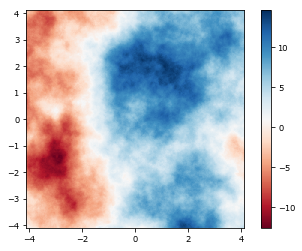

In [4]:
imshow_field(layer.phase_for(wavelength), cmap='RdBu')
plt.colorbar()
plt.show()

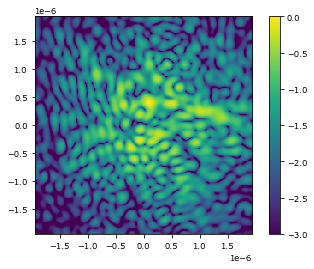

In [5]:
wf = Wavefront(aperture, wavelength)
img = prop(layer(wf))

imshow_field(np.log10(img.intensity / img.intensity.max()), vmin=-3)
plt.colorbar()
plt.show()

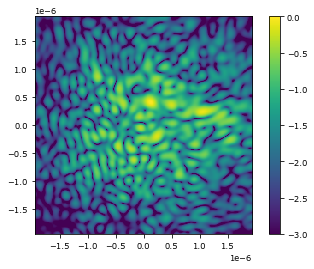

In [6]:
layer.t = 0.1 # sec

img = prop(layer(wf))

imshow_field(np.log10(img.intensity / img.intensity.max()), vmin=-3)
plt.colorbar()
plt.show()

These single layers can be combined into a multi-layer atmospheric model. 